<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula2/cifar10_keras_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [0]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170500096/170498071 [==============================] - 40s 0us/step


In [0]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [0]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# train the model usign SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=10, batch_size=32)

[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 300us/step - loss: 1.8422 - acc: 0.3420 - val_loss: 1.7706 - val_acc: 0.3777
Epoch 2/10
50000/50000 [==============================] - 14s 271us/step - loss: 1.6542 - acc: 0.4167 - val_loss: 1.5958 - val_acc: 0.4379
Epoch 3/10
50000/50000 [==============================] - 14s 271us/step - loss: 1.5730 - acc: 0.4442 - val_loss: 1.6060 - val_acc: 0.4262
Epoch 4/10
50000/50000 [==============================] - 14s 278us/step - loss: 1.5130 - acc: 0.4660 - val_loss: 1.6173 - val_acc: 0.4305
Epoch 5/10
50000/50000 [==============================] - 13s 270us/step - loss: 1.4665 - acc: 0.4840 - val_loss: 1.5915 - val_acc: 0.4354
Epoch 6/10
50000/50000 [==============================] - 14s 280us/step - loss: 1.4230 - acc: 0.4980 - val_loss: 1.4386 - val_acc: 0.4902
Epoch 7/10
50000/50000 [=================

In [0]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.78      0.24      0.37      1000
  automobile       0.65      0.58      0.61      1000
        bird       0.37      0.43      0.40      1000
         cat       0.39      0.27      0.32      1000
        deer       0.58      0.15      0.24      1000
         dog       0.50      0.31      0.39      1000
        frog       0.51      0.61      0.56      1000
       horse       0.36      0.79      0.49      1000
        ship       0.61      0.66      0.63      1000
       truck       0.45      0.68      0.54      1000

   micro avg       0.47      0.47      0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



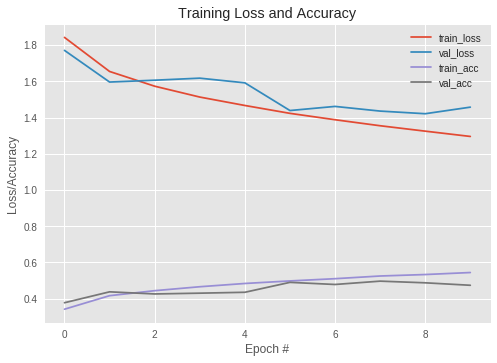

In [0]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig("output.png")